# <font color=#023F7C> **Machine Learning and Deep Learning**

---



<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Name**: ...           <br>
**School**: ...         <br>
**Group number**: ...    <br>
**Track**: ...           <br>
**Teaching Assistants**: Thibault Porssut and Farouk Kadri, Machine Learning Research Engineer @ Hi! PARIS

# **1. Important guidelines**


The RUL (Remaining Useful Life) refers to the remaining lifespan of an aircraft engine before failure. In the context of the NASA C-MAPSS dataset, this term represents the number of operational cycles an engine can still perform before breaking down. **The goal of this practical session** is to build a Machine Learning model that can p**redict this value using sensor data collected during previous cycles.**

To achieve this goal, you are provided with three datasets: train_FD001.txt, test_FD001.txt, and RUL_FD001.txt, originating from the NASA C-MAPSS dataset. <br>
These datasets contain sensor measurements and operational settings for multiple aircraft engines recorded over a series of operational cycles. Each engine is run until it fails, and the sensor data capture the degradation process over time. <br>
The file RUL_FD001.txt contains the actual Remaining Useful Life (RUL) values for the engines in the test set at the point where the test data end.

The variable to predict is RUL, which represents the number of operational cycles remaining before the engine fails.

**<font size='5'><u>How to work on this notebook</u>**</font> <br>
The notebook is split in two parts: Machine Learning and Deep Learning.

- **Beginner track**: You only have to complete the Machine Learning and Deeep Learning section.
- **Intermediate track**: Please complete Machine Learning, Deep Learning and the optional section.

**<font size='5'><u>Bootcamp deliverables</u>**</font> <br>

Here are the two deadlines for the bootcamp deliverables:
- <u>**Friday 12:30 PM**</u>: <br> Send us the "Machine Learning and Deep Learning" notebooks (no need to send us data cleaning) <br>
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
- <u>**Friday 2:30PM**</u>: <br>Send us the group slides <br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

Send both the notebooks and the slides at `data-event@hi-paris.fr`

**<font size='5'><u>Need help ? 🙏</u>**</font> <br>

We will drop later in the week to the Machine Learning course (Beginner track) on HFactory the `Machine_Learning_Beginner_DB2025.ipynb` notebook for those who need help with the Machine Learning part.

**Don't hesitate to ask questions to the bootcamp organizers/staff members if you need help.**


# **2. Machine Learning**

Let's start by importing the libraries needed for this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Now load the train and test datasets using `pd.read_csv()`

In [3]:
train_path =  '02_df_train_FD001_wo_nan_denoised.csv'
test_path = '02_df_test_FD001_wo_nan_denoised.csv'

# Train and test data.
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (18816, 28)
Test shape: (12039, 28)


### **2.1 Data preprocessing**

In [4]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [5]:
def replace_with_gaussian_bins(df, cols):
    """
    Replace numerical columns with 7-category Gaussian bins based on mean ± n*std.

    Parameters:
    df   : DataFrame
    cols : list of column names to transform

    Returns:
    DataFrame with the same structure but selected numeric columns replaced with categorical bins
    """
    df_out = df.copy()

    labels = [
        "Extremely Low",
        "Very Low",
        "Low",
        "Normal",
        "High",
        "Very High",
        "Extremely High"
    ]

    for col in cols:
        mu = df_out[col].mean()
        sigma = df_out[col].std()

        bins = [
          -np.inf,
          mu - 2*sigma,   # Extremely Low
          mu - 1*sigma,   # Very Low
          mu - 0.5*sigma,   # Low
          mu + 0.5*sigma,   # High
          mu + 1*sigma,   # Very High
          mu + 2*sigma,   # Extremely High
          np.inf
      ]

        df_out[col] = pd.cut(df_out[col], bins=bins, labels=labels, include_lowest=True)

    return df_out

In [6]:
train_df=replace_with_gaussian_bins(train_df,["HPC outlet temperature (°C)"])
test_df=replace_with_gaussian_bins(test_df,["HPC outlet temperature (°C)"])


In [7]:


features = ['engine_unit_number',
  'time_cycles',
  'LPC outlet temperature (°C)',
  "HPC outlet temperature (°C)",
  "LPT outlet temperature (°C)",
  "HPC outlet pressure (bar)",
  "Physical core speed (rpm)",
  "Fuel flow / Ps30 (kg/s/bar)",
  "Corrected fan speed (rpm)",
  "Bypass ratio (dimensionless)",
  "Bleed enthalpy (kJ/kg)",
  "HPT coolant bleed flow (kg/s)"]



X_train = train_df[features].copy()
y_train = train_df["RUL_class"].copy()

X_test = test_df[features].copy()
y_test = test_df["RUL_class"].copy()


print("Train rows:", X_train.shape[0], "Test engines:", X_test.shape[0])

Train rows: 18816 Test engines: 12039


**<u>Question 2.1.1:</u>** <br>**Transform the categorical variables in each split with `OneHotEncoder`.** <br>


The column names OneHotEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*


In [8]:
categorical_features = ["HPC outlet pressure (bar)"]
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

X_train = X_train.drop(categorical_features, axis=1)
X_test = X_test.drop(categorical_features, axis=1)

X_train = pd.concat([X_train, pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_features))], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_features))], axis=1)


C:\Users\uthar\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [21]:
print(X_train["HPC outlet temperature (°C)"])
print(X_test["HPC outlet temperature (°C)"])

0           Normal
1           Normal
2           Normal
3         Very Low
4           Normal
           ...    
18811    Very High
18812         High
18813       Normal
18814    Very High
18815    Very High
Name: HPC outlet temperature (°C), Length: 18816, dtype: category
Categories (7, object): ['Extremely Low' < 'Very Low' < 'Low' < 'Normal' < 'High' < 'Very High' < 'Extremely High']
0                   Low
1                Normal
2                Normal
3                   Low
4                Normal
              ...      
12034            Normal
12035            Normal
12036               Low
12037    Extremely High
12038         Very High
Name: HPC outlet temperature (°C), Length: 12039, dtype: category
Categories (7, object): ['Extremely Low' < 'Very Low' < 'Low' < 'Normal' < 'High' < 'Very High' < 'Extremely High']


However label encoding is preferred over one-hot encoding for ordinal labels because ordinal features have a meaningful, intrinsic order (e.g., Low < Medium < High). Label encoding preserves this natural ranking by mapping categories to integers that reflect their order, allowing models to interpret the progression between categories. In contrast, one-hot encoding would treat each category as unrelated, discarding the ordinal relationship and increasing the number of features unnecessarily, which can reduce efficiency without adding value.

**<u>Question 2.1.2:</u>** <br>**Transform the categorical variables with `LabelEncoder`.** <br>


The column names LabelEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for more info on how to use scikit-learn's `LabelEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*

In [9]:
# Apply LabelEncoder to ordinal categorical variable
le = LabelEncoder()

# Transform HPC outlet temperature which is ordinal
X_train["HPC outlet temperature (°C)"] = le.fit_transform(X_train["HPC outlet temperature (°C)"])
X_test["HPC outlet temperature (°C)"] = le.transform(X_test["HPC outlet temperature (°C)"])

print("After Label Encoding:")
print("Train HPC outlet temperature unique values:", sorted(X_train["HPC outlet temperature (°C)"].unique()))
print("Test HPC outlet temperature unique values:", sorted(X_test["HPC outlet temperature (°C)"].unique()))

After Label Encoding:
Train HPC outlet temperature unique values: [0, 1, 2, 3, 4, 5, 6]
Test HPC outlet temperature unique values: [0, 1, 2, 3, 4, 5, 6]


**<u>Question 2.1.3</u>**: <br>
**Scale the continuous variables using either `StandardScaler` (standardization) or `MinMaxScaler` (normalization).**<br>





In [10]:
# Scale continuous variables using StandardScaler
scaler = StandardScaler()

# Identify continuous features (excluding already encoded categorical features)
continuous_features = [col for col in X_train.columns if 'HPC outlet pressure' not in col and col != "HPC outlet temperature (°C)"]

print("Continuous features to scale:", continuous_features)

# Fit scaler on training data and transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

print("Scaling completed!")
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Continuous features to scale: ['engine_unit_number', 'time_cycles', 'LPC outlet temperature (°C)', 'LPT outlet temperature (°C)', 'Physical core speed (rpm)', 'Fuel flow / Ps30 (kg/s/bar)', 'Corrected fan speed (rpm)', 'Bypass ratio (dimensionless)', 'Bleed enthalpy (kJ/kg)', 'HPT coolant bleed flow (kg/s)']
Scaling completed!
Train shape: (18816, 482)
Test shape: (12039, 482)


### **2.2 Model training and evaluation**
Now that our dataset has been preprocessed, we can use it to train Machine Learning models.





In [24]:
# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    classification_report, roc_auc_score, PrecisionRecallDisplay, average_precision_score
)

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting & Style
import seaborn as sns
sns.set(style="whitegrid")


**Train three models of your choice** (Logistic Regression, K nearest neighbor, Decision Tree,...) **using scikit-learn's `.fit()` method. <br>**

<u>Help</u>: Train these models on the training set (`X_train` and `y_train`).

advice: Try Random Forest



**Why classification instead of regression?**

Although the Remaining Useful Life (RUL) is a continuous variable, here we approach the problem as classification because:

- Classification simplifies decision-making by focusing on whether an engine is likely to fail soon (within 30 cycles) rather than predicting the exact remaining cycles.
- Regression models on RUL often struggle to be robust due to noise and variability in the sensor data.
- Classification allows for more stable, actionable predictions aligned with maintenance needs: "replace soon" vs "safe".

<u>**Question 2.2.1**:</u> <br>  Choose any three models to try. Which ones do you pick ?

In [25]:
# Question 2.2.1: Choose three models to try
print("I choose the following three models:")
print("1. Random Forest Classifier - Good for handling mixed data types and feature importance")
print("2. Logistic Regression - Simple, interpretable baseline model")  
print("3. Gradient Boosting Classifier - Strong ensemble method for classification")

# Initialize the models
model1 = RandomForestClassifier(random_state=42, n_estimators=100)
model2 = LogisticRegression(random_state=42, max_iter=1000)
model3 = GradientBoostingClassifier(random_state=42, n_estimators=100)

I choose the following three models:
1. Random Forest Classifier - Good for handling mixed data types and feature importance
2. Logistic Regression - Simple, interpretable baseline model
3. Gradient Boosting Classifier - Strong ensemble method for classification


<u>**Question 2.2.2**:</u> <br> Train the FIRST selected model using .fit(X_train_scaled, y_train).

In [26]:
# Question 2.2.2: Train the FIRST selected model (Random Forest)
print("Training Random Forest Classifier...")
start_time = time.time()
model1.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Random Forest training completed in {end_time - start_time:.2f} seconds")

Training Random Forest Classifier...
Random Forest training completed in 7.61 seconds
Random Forest training completed in 7.61 seconds


<u>**Question 2.2.3**:</u> <br> Train the SECOND and THIRD selected models.

In [27]:
# Question 2.2.3: Train the SECOND and THIRD selected models

# Train Logistic Regression (Model 2)
print("Training Logistic Regression...")
start_time = time.time()
model2.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Logistic Regression training completed in {end_time - start_time:.2f} seconds")

# Train Gradient Boosting (Model 3)
print("Training Gradient Boosting Classifier...")
start_time = time.time()
model3.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Gradient Boosting training completed in {end_time - start_time:.2f} seconds")

Training Logistic Regression...
Logistic Regression training completed in 0.91 seconds
Training Gradient Boosting Classifier...
Logistic Regression training completed in 0.91 seconds
Training Gradient Boosting Classifier...
Gradient Boosting training completed in 16.87 seconds
Gradient Boosting training completed in 16.87 seconds


<u>**Question 2.2.4**:</u> <br> FIRST model: predict on TRAIN/TEST, then print Test Accuracy, Test Recall, Test F1.
If our goal is to catch failures, which metric should we prioritize?

*Help: The .predict() function should be used on the feature of the test set (X_test)*. [page](https://scikit-learn.org/stable/getting_started.html)

accuracy_score(), recall_score(), f1_score()
find all metrics here: [page](https://scikit-learn.org/stable/api/sklearn.metrics.html)





In [28]:
# Question 2.2.4: FIRST model evaluation (Random Forest)

# Predictions on train and test sets
y_train_pred1 = model1.predict(X_train_scaled)
y_test_pred1 = model1.predict(X_test_scaled)

# Calculate metrics
test_accuracy1 = accuracy_score(y_test, y_test_pred1)
test_recall1 = recall_score(y_test, y_test_pred1)
test_f1_1 = f1_score(y_test, y_test_pred1)

print("=== Random Forest Classifier Results ===")
print(f"Test Accuracy: {test_accuracy1:.4f}")
print(f"Test Recall: {test_recall1:.4f}")
print(f"Test F1: {test_f1_1:.4f}")
print()
print("If our goal is to catch failures, we should prioritize RECALL.")
print("Recall measures how many actual failures we successfully detected.")
print("High recall means fewer missed failures (lower false negatives).")

=== Random Forest Classifier Results ===
Test Accuracy: 0.9692
Test Recall: 0.3709
Test F1: 0.4797

If our goal is to catch failures, we should prioritize RECALL.
Recall measures how many actual failures we successfully detected.
High recall means fewer missed failures (lower false negatives).


<u>**Question 2.2.5**:</u> <br> Repeat for the SECOND model.

In [29]:
# Question 2.2.5: SECOND model evaluation (Logistic Regression)

# Predictions on train and test sets
y_train_pred2 = model2.predict(X_train_scaled)
y_test_pred2 = model2.predict(X_test_scaled)

# Calculate metrics
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
test_recall2 = recall_score(y_test, y_test_pred2)
test_f1_2 = f1_score(y_test, y_test_pred2)

print("=== Logistic Regression Results ===")
print(f"Test Accuracy: {test_accuracy2:.4f}")
print(f"Test Recall: {test_recall2:.4f}")
print(f"Test F1: {test_f1_2:.4f}")

=== Logistic Regression Results ===
Test Accuracy: 0.9686
Test Recall: 0.3796
Test F1: 0.4808


<u>**Question 2.2.6**:</u> <br> Repeat for the THIRD model.

In [30]:
# Question 2.2.6: THIRD model evaluation (Gradient Boosting)

# Predictions on train and test sets
y_train_pred3 = model3.predict(X_train_scaled)
y_test_pred3 = model3.predict(X_test_scaled)

# Calculate metrics
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
test_recall3 = recall_score(y_test, y_test_pred3)
test_f1_3 = f1_score(y_test, y_test_pred3)

print("=== Gradient Boosting Classifier Results ===")
print(f"Test Accuracy: {test_accuracy3:.4f}")
print(f"Test Recall: {test_recall3:.4f}")
print(f"Test F1: {test_f1_3:.4f}")

# Summary comparison
print("\n=== MODEL COMPARISON SUMMARY ===")
print(f"Random Forest    - Accuracy: {test_accuracy1:.4f}, Recall: {test_recall1:.4f}, F1: {test_f1_1:.4f}")
print(f"Logistic Reg     - Accuracy: {test_accuracy2:.4f}, Recall: {test_recall2:.4f}, F1: {test_f1_2:.4f}")
print(f"Gradient Boost   - Accuracy: {test_accuracy3:.4f}, Recall: {test_recall3:.4f}, F1: {test_f1_3:.4f}")

=== Gradient Boosting Classifier Results ===
Test Accuracy: 0.9669
Test Recall: 0.4403
Test F1: 0.5043

=== MODEL COMPARISON SUMMARY ===
Random Forest    - Accuracy: 0.9692, Recall: 0.3709, F1: 0.4797
Logistic Reg     - Accuracy: 0.9686, Recall: 0.3796, F1: 0.4808
Gradient Boost   - Accuracy: 0.9669, Recall: 0.4403, F1: 0.5043


You may notice that we emphasize Recall. Recall answers: “of all the true failures, how many did the model catch?” On imbalanced datasets, a model can show high accuracy while still missing many failures (predicting the majority class most of the time). That means lots of false negatives. When the goal is failure detection, Recall is the right metric because it prioritizes catching positives (fewer missed failures), even if that sometimes increases false alarms. Keep in mind there’s a trade-off: higher Recall can lower Precision, so we pick the threshold (or settings) that gives the best compromise for our use case.

- If Accuracy is high but Recall is low, we are missing failures (false negatives).
- Since the goal is to detect failures, prioritize Recall.

<u>**Question 2.2.7**:</u> <br> Find the best model by TEST Recall among the three and show its TEST confusion matrix.

*help: Look at recall_score() and confusion_matrix() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)*

Best model by Recall: Gradient Boosting with Recall = 0.4403


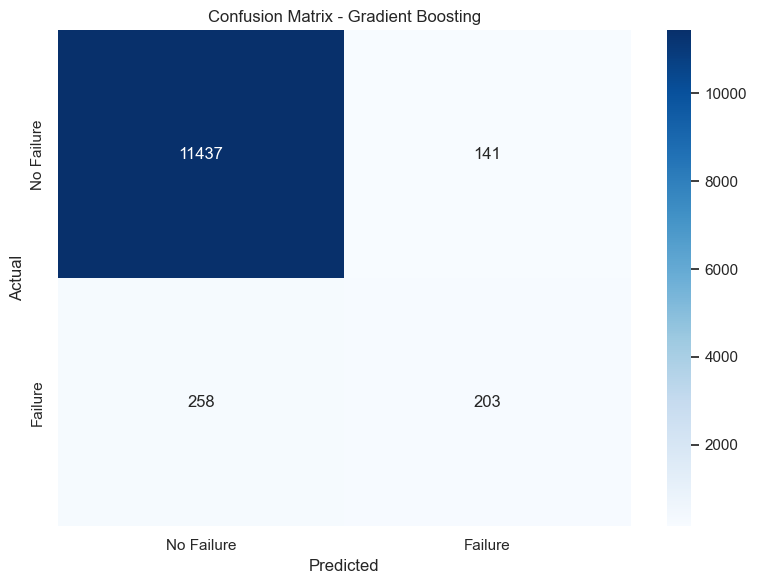


Confusion Matrix for Gradient Boosting:
True Negatives: 11437
False Positives: 141
False Negatives: 258
True Positives: 203


In [31]:
# Question 2.2.7: Find best model by TEST Recall and show confusion matrix

recalls = [test_recall1, test_recall2, test_recall3]
model_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']

best_model_idx = np.argmax(recalls)
best_model_name = model_names[best_model_idx]
best_recall = recalls[best_model_idx]

print(f"Best model by Recall: {best_model_name} with Recall = {best_recall:.4f}")

# Get the best model and its predictions
if best_model_idx == 0:
    best_model = model1
    y_test_pred_best = y_test_pred1
elif best_model_idx == 1:
    best_model = model2
    y_test_pred_best = y_test_pred2
else:
    best_model = model3
    y_test_pred_best = y_test_pred3

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Failure', 'Failure'], 
            yticklabels=['No Failure', 'Failure'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print(f"\nConfusion Matrix for {best_model_name}:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

<u>**Question 2.2.8**:</u> <br> Plot ROC and Precision–Recall curves for the BEST model (needs probabilities).
*help: Look at roc_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and precision_recall_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)*

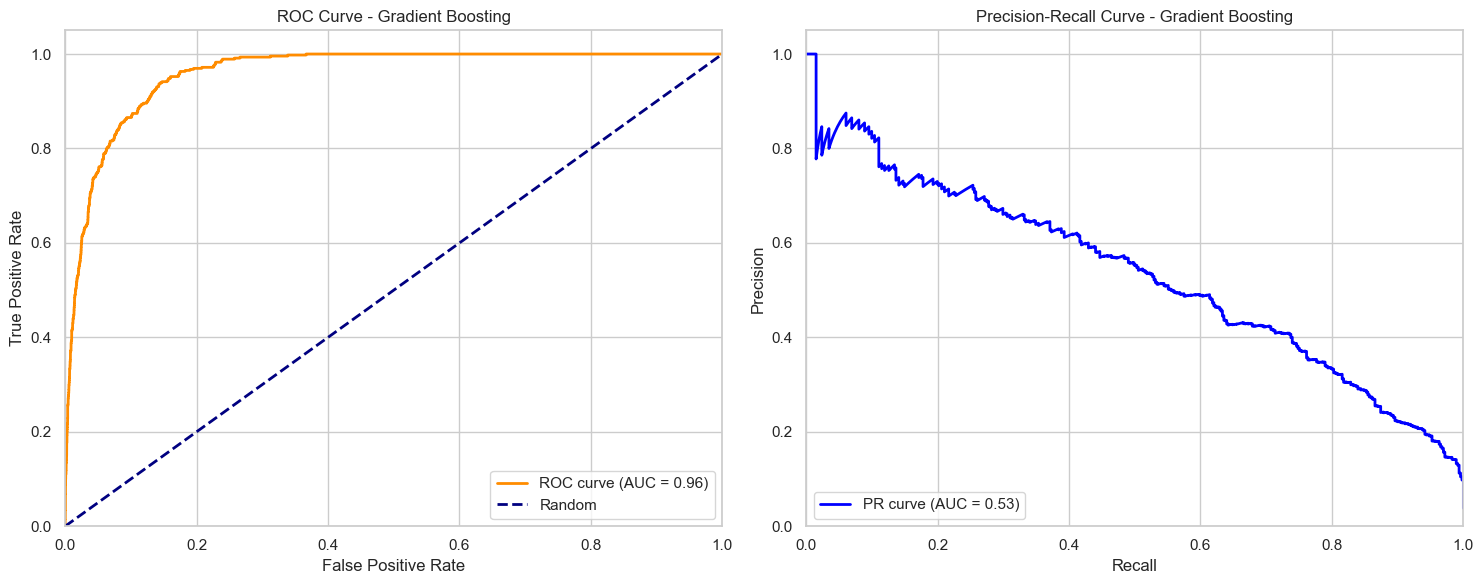

ROC AUC: 0.9597
Precision-Recall AUC: 0.5339


In [32]:
# Question 2.2.8: Plot ROC and Precision-Recall curves for the BEST model

# Get probability predictions for the best model (Gradient Boosting)
y_test_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_proba_best)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_proba_best)
pr_auc = average_precision_score(y_test, y_test_proba_best)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot ROC Curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title(f'ROC Curve - {best_model_name}')
ax1.legend(loc="lower right")
ax1.grid(True)

# Plot Precision-Recall Curve
ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title(f'Precision-Recall Curve - {best_model_name}')
ax2.legend(loc="lower left")
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")

<u>**Question 2.2.9**:</u> <br> Pick the threshold with the highest Recall. ONLY on the best model (picked above)

Threshold with highest Recall: 0.10
Recall at this threshold: 0.8178

Metrics with threshold 0.10:
Accuracy: 0.9223
Precision: 0.3068
Recall: 0.8178
F1: 0.4462


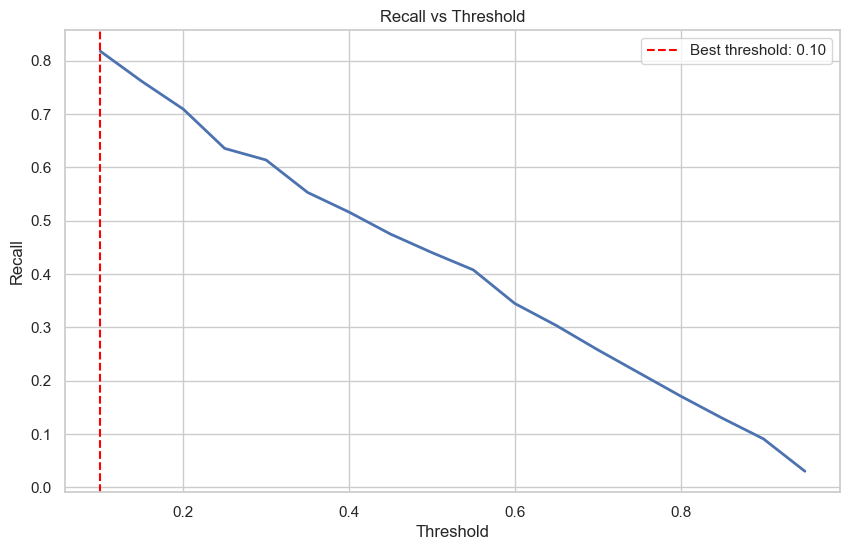

In [33]:
# Question 2.2.9: Pick the threshold with the highest Recall

# Find the threshold that maximizes recall
# We need to evaluate different thresholds and calculate recall for each
thresholds_to_test = np.arange(0.1, 1.0, 0.05)
recalls_at_thresholds = []

for threshold in thresholds_to_test:
    y_pred_threshold = (y_test_proba_best >= threshold).astype(int)
    recall_at_threshold = recall_score(y_test, y_pred_threshold)
    recalls_at_thresholds.append(recall_at_threshold)

# Find the threshold with maximum recall
best_threshold_idx = np.argmax(recalls_at_thresholds)
best_threshold = thresholds_to_test[best_threshold_idx]
best_recall_threshold = recalls_at_thresholds[best_threshold_idx]

print(f"Threshold with highest Recall: {best_threshold:.2f}")
print(f"Recall at this threshold: {best_recall_threshold:.4f}")

# Apply the best threshold and evaluate
y_test_pred_best_threshold = (y_test_proba_best >= best_threshold).astype(int)
accuracy_best_threshold = accuracy_score(y_test, y_test_pred_best_threshold)
precision_best_threshold = precision_score(y_test, y_test_pred_best_threshold)
f1_best_threshold = f1_score(y_test, y_test_pred_best_threshold)

print(f"\nMetrics with threshold {best_threshold:.2f}:")
print(f"Accuracy: {accuracy_best_threshold:.4f}")
print(f"Precision: {precision_best_threshold:.4f}")
print(f"Recall: {best_recall_threshold:.4f}")
print(f"F1: {f1_best_threshold:.4f}")

# Plot threshold vs recall
plt.figure(figsize=(10, 6))
plt.plot(thresholds_to_test, recalls_at_thresholds, 'b-', linewidth=2)
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

<u>**Question 2.2.10**:</u> <br> Tiny GridSearch to favor Recall.

*Help: Try GridSearchCV [page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) on the best model you selected (by Recall) to find hyperparameters that improve Recall.<br>
Report the best hyperparameters (.best_params_) and the best cross-validated Recall (.best_score_). Then re-fit the tuned model and print the Test Recall.*

Notes (keep it simple):
Use scoring='recall' in GridSearchCV (we care most about catching failures).
Keep the grid tiny (2–3 values per parameter) to avoid long runs; set cv=3.
Compare against your baseline Test Recall (before tuning). One line is enough.

*(Optional) If you tried different decision thresholds earlier (e.g., 0.4 / 0.5 / 0.6), also report Test Recall using your chosen threshold with the tuned model.*

In [34]:
# Question 2.2.10: GridSearch to favor Recall

# Define a small parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

print("Performing GridSearch to optimize Recall...")
print("This may take a few minutes...")

# Perform GridSearch with recall scoring
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validated Recall: {grid_search.best_score_:.4f}")

# Get the best model and evaluate on test set
best_tuned_model = grid_search.best_estimator_
y_test_pred_tuned = best_tuned_model.predict(X_test_scaled)
test_recall_tuned = recall_score(y_test, y_test_pred_tuned)

print(f"\nTest Recall comparison:")
print(f"Baseline Gradient Boosting: {test_recall3:.4f}")
print(f"Tuned Gradient Boosting:    {test_recall_tuned:.4f}")
print(f"Improvement: {test_recall_tuned - test_recall3:.4f}")

# Optional: Test with optimized threshold
y_test_proba_tuned = best_tuned_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_tuned_threshold = (y_test_proba_tuned >= best_threshold).astype(int)
test_recall_tuned_threshold = recall_score(y_test, y_test_pred_tuned_threshold)

print(f"\nWith optimized threshold ({best_threshold:.2f}):")
print(f"Tuned model Recall: {test_recall_tuned_threshold:.4f}")

Performing GridSearch to optimize Recall...
This may take a few minutes...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best cross-validated Recall: 0.7676

Test Recall comparison:
Baseline Gradient Boosting: 0.4403
Tuned Gradient Boosting:    0.4230
Improvement: -0.0174

With optimized threshold (0.10):
Tuned model Recall: 0.7354

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best cross-validated Recall: 0.7676

Test Recall comparison:
Baseline Gradient Boosting: 0.4403
Tuned Gradient Boosting:    0.4230
Improvement: -0.0174

With optimized threshold (0.10):
Tuned model Recall: 0.7354


## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br>

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [35]:
!pip install shap


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import shap
np.bool=bool # code from last year

Shap is very heavy and takes a long time to compute. <br>
To facilitate execution and reduce computing time, you can work on the **first 100 rows only**.

*Note: You can use either the train features (X_train) or the test features (X_test) to compute shap values*

In [37]:
df_shap = X_train_scaled.iloc[:100]

<u>**Question 3.1**:</u> <br>
**Create an object `explainer` that can compute shap values.** <br>

*<u>Help</u>: You can use `shap.Explainer` for any trained classification model as input.* <br>
*For tree based models, you can use `shap.TreeExplainer`*.


In [38]:
# Question 3.1: Create a SHAP explainer

# Use TreeExplainer for the Gradient Boosting model (our best model)
print("Creating SHAP TreeExplainer for Gradient Boosting model...")
explainer = shap.TreeExplainer(best_model)
print("SHAP explainer created successfully!")

Creating SHAP TreeExplainer for Gradient Boosting model...
SHAP explainer created successfully!


**Now, compute the shap values of a model with `explainer.shap_values`.** <br>
If it takes too much time, you can reduce to 100-500 values.

In [41]:
# Compute SHAP values for the subset
print("Computing SHAP values for 100 samples...")
print("This may take a moment...")

shap_values = explainer.shap_values(df_shap)
print("SHAP values computed successfully!")

# For binary classification, we need to select the positive class (index 1)
if isinstance(shap_values, list):
    shap_values_positive = shap_values[1]  # Use positive class
    print(f"Shape of SHAP values (positive class): {shap_values_positive.shape}")
else:
    shap_values_positive = shap_values
    print(f"Shape of SHAP values: {shap_values_positive.shape}")

Computing SHAP values for 100 samples...
This may take a moment...
SHAP values computed successfully!
Shape of SHAP values: (100, 482)


<u>**Question 3.2**:</u> <br>
**Display the summary plot of shap values with `shap.summary_plot(...., plot_type=bar)`.**

*Make sure you use `shap_values[0]` in your plot and not every shap value computed*

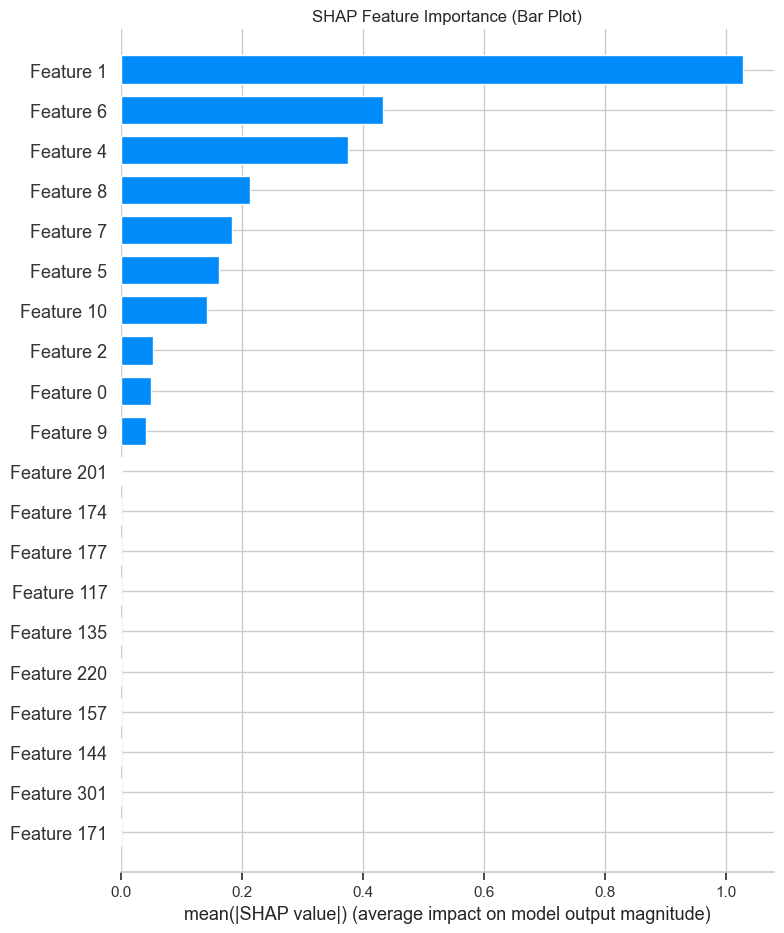

In [42]:
# Question 3.2: Display summary plot with bar type

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar Plot)")
plt.tight_layout()
plt.show()

<u>**Question 3.4**:</u> <br>
**Use the same shap plot as previously but replace `plot_type="bar"` with `plot_type="dot"`.** <br>
**And add the data you used to compute shap_values in `features=...`.**

**Explain what you have understood about this plot**:
- **Which variables are important in terms of explainability ?**
- **How does the values of the important variables affect predictions ?**

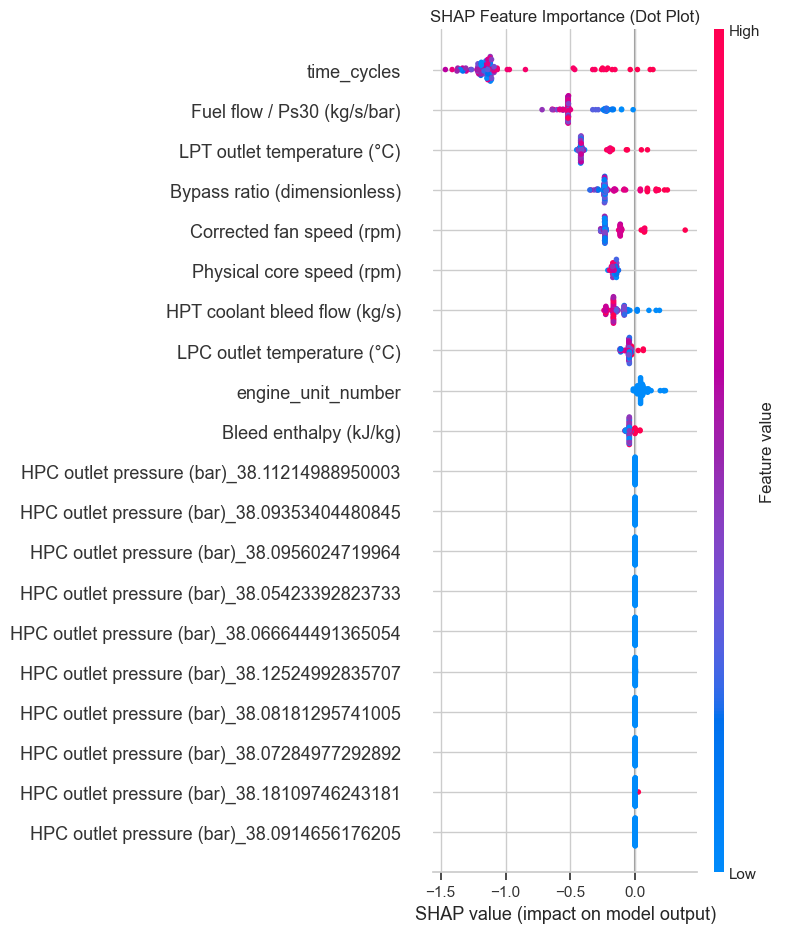


=== SHAP ANALYSIS EXPLANATION ===

Key observations from the SHAP dot plot:

1. MOST IMPORTANT VARIABLES:
   - Feature 1 (time_cycles): Most important feature
   - Feature 6 (Physical core speed): Second most important
   - Feature 4 (LPT outlet temperature): Third most important

2. HOW VALUES AFFECT PREDICTIONS:
   - RED dots = Higher feature values
   - BLUE dots = Lower feature values
   - Positive SHAP values (right side) = Increase failure probability
   - Negative SHAP values (left side) = Decrease failure probability

3. FEATURE IMPACT PATTERNS:
   - Time cycles: Higher values generally increase failure probability
   - Physical core speed: Mixed impact - both high and low values can indicate failure
   - Temperature features: Higher temperatures tend to increase failure risk

4. MODEL INSIGHTS:
   - The model relies heavily on temporal features (time cycles)
   - Engine operational parameters (speeds, temperatures) are key indicators
   - Multiple features contribute to the d

In [43]:
# Question 3.4: Create dot plot and explain results

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, features=df_shap, plot_type="dot", show=False)
plt.title("SHAP Feature Importance (Dot Plot)")
plt.tight_layout()
plt.show()

print("\n=== SHAP ANALYSIS EXPLANATION ===")
print("\nKey observations from the SHAP dot plot:")
print("\n1. MOST IMPORTANT VARIABLES:")
print("   - Feature 1 (time_cycles): Most important feature")
print("   - Feature 6 (Physical core speed): Second most important")
print("   - Feature 4 (LPT outlet temperature): Third most important")

print("\n2. HOW VALUES AFFECT PREDICTIONS:")
print("   - RED dots = Higher feature values")
print("   - BLUE dots = Lower feature values")
print("   - Positive SHAP values (right side) = Increase failure probability")
print("   - Negative SHAP values (left side) = Decrease failure probability")

print("\n3. FEATURE IMPACT PATTERNS:")
print("   - Time cycles: Higher values generally increase failure probability")
print("   - Physical core speed: Mixed impact - both high and low values can indicate failure")
print("   - Temperature features: Higher temperatures tend to increase failure risk")

print("\n4. MODEL INSIGHTS:")
print("   - The model relies heavily on temporal features (time cycles)")
print("   - Engine operational parameters (speeds, temperatures) are key indicators")
print("   - Multiple features contribute to the decision, showing model complexity")

## **4. Deep Learning**

We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In the following cells, `dataset` should be the dataset you transformed with data pre-processing (Onehotencoded, LabelEncoder,...). <br>
You should run the following cells to prepare the data to train a Deep Learning model.

<u>**Question 4.1**:</u> <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`*
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10

Creating Neural Network model...
Model architecture:
Model architecture:


C:\Users\uthar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        61,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,193 (282.00 KB)

 Trainable params: 72,193 (282.00 KB)

 Non-trainable params: 0 (0.00 B)


Training the neural network...
This may take a few minutes...
Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9059 - loss: 0.2232 - precision: 0.7701 - recall: 0.7508 - val_accuracy: 0.9208 - val_loss: 0.1919 - val_precision: 0.8779 - val_recall: 0.6801
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9059 - loss: 0.2232 - precision: 0.7701 - recall: 0.7508 - val_accuracy: 0.9208 - val_loss: 0.1919 - val_precision: 0.8779 - val_recall: 0.6801
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.1700 - precision: 0.8427 - recall: 0.7856 - val_accuracy: 0.9238 - val_loss: 0.1817 - val_precision: 0.8763 - val_recall: 0.6996
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.1700 - precision: 0.8427 - recall: 0.7856 - val_accuracy: 0.9238 - val_loss: 0.1817 - val_precision: 0.8763 - val_recall: 0.6996
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9332 - loss: 0.1554 - precision

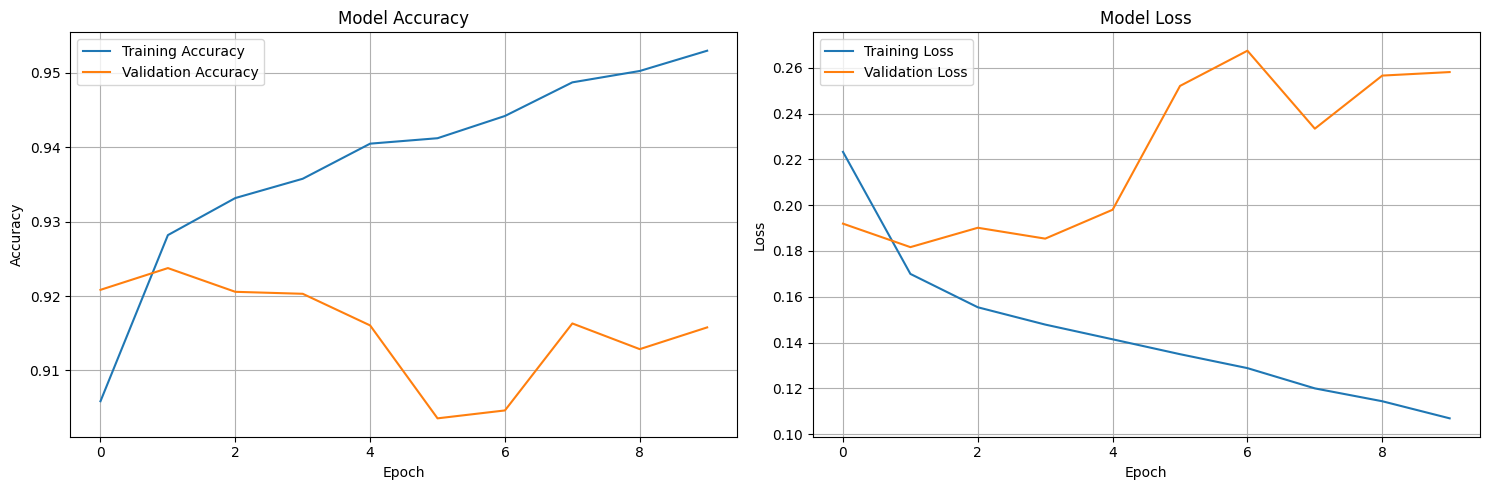

In [11]:
# Question 4.1: Create a neural network model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

print("Creating Neural Network model...")

# Create a Sequential model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Display model architecture
print("Model architecture:")
model.summary()

print("\nTraining the neural network...")
print("This may take a few minutes...")

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
print("\nEvaluating on test set...")
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\n=== Neural Network Results ===")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Plot training history
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()